In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime as dt
from sklearn.model_selection import cross_val_predict
import warnings
import plotly
import plotly.offline as py
import plotly.graph_objs as go
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [9]:
dfa  = pd.read_csv(r"C:\Users\lenovo\Desktop\capstone\Accident_Information.csv", sep=',')

In [10]:
dfa.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [11]:
encoding = {
"Carriageway_Hazards": {"None": 0, "Other object on road": 1, "Any animal in carriageway (except ridden horse)": 1,  "Pedestrian in carriageway - not injured": 1, "Previous accident": 1, "Vehicle load on road": 1,  "Data missing or out of range": 0  }
}
dfa.replace(encoding, inplace=True)
print(dfa['Carriageway_Hazards'].value_counts())

0    2010553
1      36703
Name: Carriageway_Hazards, dtype: int64


In [12]:
print(dfa['Light_Conditions'].value_counts())
encoding_light = {"Light_Conditions": {"Daylight": 0, "Darkness - lights lit": 1, "Darkness - no lighting": 1, "Darkness - lighting unknown": 1, "Darkness - lights unlit": 1, "Data missing or out of range": 0}}
dfa.replace(encoding_light, inplace=True)
print(dfa['Light_Conditions'].value_counts())

Daylight                        1496121
Darkness - lights lit            404144
Darkness - no lighting           112644
Darkness - lighting unknown       24362
Darkness - lights unlit            9971
Data missing or out of range         14
Name: Light_Conditions, dtype: int64
0    1496135
1     551121
Name: Light_Conditions, dtype: int64


In [13]:
print(dfa['Day_of_Week'].value_counts())
encoding_day_of_week = {"Day_of_Week": {"Saturday": 1, "Sunday": 1, "Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0}}
dfa.replace(encoding_day_of_week, inplace=True)
print(dfa['Day_of_Week'].value_counts())

Friday       335183
Wednesday    308580
Thursday     308240
Tuesday      306292
Monday       290482
Saturday     273152
Sunday       225327
Name: Day_of_Week, dtype: int64
0    1548777
1     498479
Name: Day_of_Week, dtype: int64


In [14]:
print(dfa['Special_Conditions_at_Site'].value_counts())
encoding_Special_Conditions_at_Site = {"Special_Conditions_at_Site": {"None": 0, "Roadworks": 1, "Oil or diesel": 1, "Mud": 1, "Road surface defective": 1, "Auto traffic signal - out": 1, "Road sign or marking defective or obscured": 1, "Auto signal part defective": 1, "Data missing or out of range": 0}}
dfa.replace(encoding_Special_Conditions_at_Site, inplace=True)
print(dfa['Special_Conditions_at_Site'].value_counts())

None                                          1995137
Roadworks                                       23525
Oil or diesel                                    6797
Mud                                              6363
Road surface defective                           4801
Auto traffic signal - out                        3855
Road sign or marking defective or obscured       2930
Data missing or out of range                     2835
Auto signal part defective                       1013
Name: Special_Conditions_at_Site, dtype: int64
0    1997972
1      49284
Name: Special_Conditions_at_Site, dtype: int64


In [16]:
encoding_1st_road_class = {"1st_Road_Class": {"A": 1, "A(M)": 1, "B": 2, "C": 3, "Motorway": 4, "Unclassified": 1}}
dfa.replace(encoding_1st_road_class, inplace=True)
dfa['1st_Road_Class'].value_counts()

1    1536156
2     258076
3     174953
4      78071
Name: 1st_Road_Class, dtype: int64

In [19]:
#replacing 'Data missing or out of range' with most occured value 'Give way or uncontrolled'
dfa['Junction_Control'] = dfa['Junction_Control'].replace(['Data missing or out of range'], 'Give way or uncontrolled')

In [20]:
dfa['Junction_Control'].value_counts()

Give way or uncontrolled               1742624
Auto traffic signal                     211335
Not at junction or within 20 metres      77304
Stop sign                                12333
Authorised person                         3660
Name: Junction_Control, dtype: int64

In [21]:
encoding_junction_detail = {"Junction_Control": 
                            {"Give way or uncontrolled": 1,
                             "Auto traffic signal": 2,
                             "Not at junction or within 20 metres": 3, 
                             "Stop sign": 4,
                             "Authorised person": 5,
                              }}
dfa.replace(encoding_junction_detail, inplace=True)
dfa['Junction_Control'].value_counts()

1    1742624
2     211335
3      77304
4      12333
5       3660
Name: Junction_Control, dtype: int64

In [22]:
encoding_junction_detail = {"Junction_Detail": 
                            {"Not at junction or within 20 metres": 1,
                             "T or staggered junction": 2,
                             "Crossroads": 3, 
                             "Roundabout": 4,
                             "Private drive or entrance": 5,
                             "Other junction": 6,
                             "Slip road": 7,
                             "More than 4 arms (not roundabout)": 8,
                             "Mini-roundabout": 9,
                             "Data missing or out of range": 1 }}
dfa.replace(encoding_junction_detail, inplace=True)
dfa['Junction_Detail'].value_counts()

1    827957
2    635349
3    196283
4    177214
5     72751
6     59692
7     30052
8     25551
9     22407
Name: Junction_Detail, dtype: int64

In [23]:
encoding_road_surface_cond = {"Road_Surface_Conditions": 
                            {"Dry": 1,
                             "Wet or damp": 2,
                             "Frost or ice": 3, 
                             "Snow": 4,
                             "Flood over 3cm. deep": 5,
                             "Data missing or out of range": 1 }}
dfa.replace(encoding_road_surface_cond, inplace=True)
dfa['Road_Surface_Conditions'].value_counts()

1    1423360
2     568563
3      40321
4      12167
5       2845
Name: Road_Surface_Conditions, dtype: int64

In [24]:

encoding_road_type = {"Road_Type": 
                            {"Single carriageway": 1,
                             "Dual carriageway": 2,
                             "Roundabout": 3, 
                             "One way street": 4,
                             "Slip road": 5,
                             "Unknown": 0,
                             "Data missing or out of range": 1 }}
dfa.replace(encoding_road_type, inplace=True)
dfa['Road_Type'].value_counts()

1    1527883
2     303407
3     136754
4      43258
5      21558
0      14396
Name: Road_Type, dtype: int64

In [25]:
encoding_urban_rural = {"Urban_or_Rural_Area": 
                            {"Urban": 1,
                             "Rural": 2,
                             "Unallocated": 1 }}
dfa.replace(encoding_urban_rural, inplace=True)
dfa['Urban_or_Rural_Area'].value_counts()

1    1322499
2     724757
Name: Urban_or_Rural_Area, dtype: int64

In [26]:

encoding_weather = {"Weather_Conditions": 
                            {"Fine no high winds": 1,
                             "Raining no high winds": 2,
                             "Raining + high winds": 3,
                             "Fine + high winds": 4,
                             "Snowing no high winds": 5,
                             "Fog or mist": 6,
                             "Snowing + high winds": 7,
                             "Unknown": 1,
                             "Other": 1,
                             "Data missing or out of range": 1 }}
dfa.replace(encoding_weather, inplace=True)
dfa['Weather_Conditions'].value_counts()


1    1726874
2     239281
3      28343
4      25816
5      13387
6      11068
7       2487
Name: Weather_Conditions, dtype: int64

In [27]:
np.where(np.isnan(dfa['Speed_limit']))

(array([1801605, 1843133, 1843396, 1857338, 1857382, 1857458, 1857466,
        1857525, 1857526, 1857527, 1857531, 1857539, 1857561, 1857564,
        1857583, 1857610, 1857613, 1857618, 1857622, 1857627, 1857635,
        1857681, 1857704, 1857720, 1857736, 1857737, 1857772, 1898106,
        1898251, 1898467, 1898663, 1898938, 1899072, 1899103, 1899306,
        1899388, 1912877], dtype=int64),)

In [28]:
dfa['Speed_limit'].fillna((dfa['Speed_limit'].mean()), inplace=True)

In [29]:
dfa['Time'].fillna(0, inplace=True)

In [30]:
def period(row):
    rdf = []
    if(type(row) == float):
        row = str(row)
        rdf = row.split(".")
    else:
        rdf = str(row).split(":"); # day -- 8am-8pm
        
    hr = rdf[0]
    if int(hr) > 8 and int(hr) < 20:
        return 1;
    else:
        return 2;

In [67]:
dfa['Time'] = dfa['Time'].apply(period)

In [33]:
df_train1 = dfa[['1st_Road_Class','Carriageway_Hazards','Junction_Control','Day_of_Week','Junction_Detail','Light_Conditions','Road_Surface_Conditions','Road_Type','Special_Conditions_at_Site','Speed_limit','Time','Urban_or_Rural_Area','Weather_Conditions','Accident_Severity']]

In [34]:
df_slight = df_train1[df_train1['Accident_Severity']=='Slight']

In [35]:
df_serious = df_train1[df_train1['Accident_Severity']=='Serious']
df_fatal = df_train1[df_train1['Accident_Severity']=='Fatal']
df_serious['Accident_Severity'].value_counts()

Serious    286339
Name: Accident_Severity, dtype: int64

In [36]:
random_subset = df_slight.sample(n=3)
random_subset.head()

,1st_Road_Class,Carriageway_Hazards,Junction_Control,Day_of_Week,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Accident_Severity
807020,1,0,1,1,2,0,2,1,0,30.0,1,1,1,Slight
645480,1,0,1,0,4,0,1,1,0,30.0,1,1,1,Slight
835140,3,0,1,0,4,0,2,3,0,30.0,1,1,2,Slight


In [37]:
df_fatal['Accident_Severity'].value_counts()

Fatal    26369
Name: Accident_Severity, dtype: int64

In [38]:
df_slight_sampling = df_slight.sample(n=45000)

In [40]:
df_serious_sampling = df_serious.sample(n=24693)  #Matched number of records with the rarer class (Fatal#24693)

In [41]:
df_final_sampling = pd.concat([df_serious_sampling,df_slight_sampling,df_fatal])

In [42]:
df_final_sampling.head()

,1st_Road_Class,Carriageway_Hazards,Junction_Control,Day_of_Week,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Accident_Severity
72838,1,0,2,0,8,1,1,1,0,30.0,2,1,1,Serious
1318514,1,0,1,0,2,0,1,1,0,30.0,1,1,1,Serious
1280572,3,0,1,0,1,0,1,1,0,30.0,1,2,1,Serious
414079,2,0,1,1,9,1,1,3,0,30.0,2,1,1,Serious
322033,1,0,1,0,1,1,1,1,0,60.0,2,2,1,Serious


In [43]:
df_test = df_final_sampling[['Accident_Severity']]

In [44]:
#replacing 'Data missing or out of range' with most occured value 'None'
df_test['Accident_Severity'] = df_test['Accident_Severity'].replace(['Fatal'], 'Serious')

In [45]:
df_train = df_final_sampling[['1st_Road_Class','Carriageway_Hazards','Junction_Control','Day_of_Week','Junction_Detail','Light_Conditions','Road_Surface_Conditions','Road_Type','Special_Conditions_at_Site','Speed_limit','Time','Urban_or_Rural_Area','Weather_Conditions']]

In [69]:
df_test['Accident_Severity'].value_counts()
df_test

,Accident_Severity
72838,Serious
1318514,Serious
1280572,Serious
414079,Serious
322033,Serious
...,...
2047144,Serious
2047218,Serious
2047225,Serious
2047228,Serious


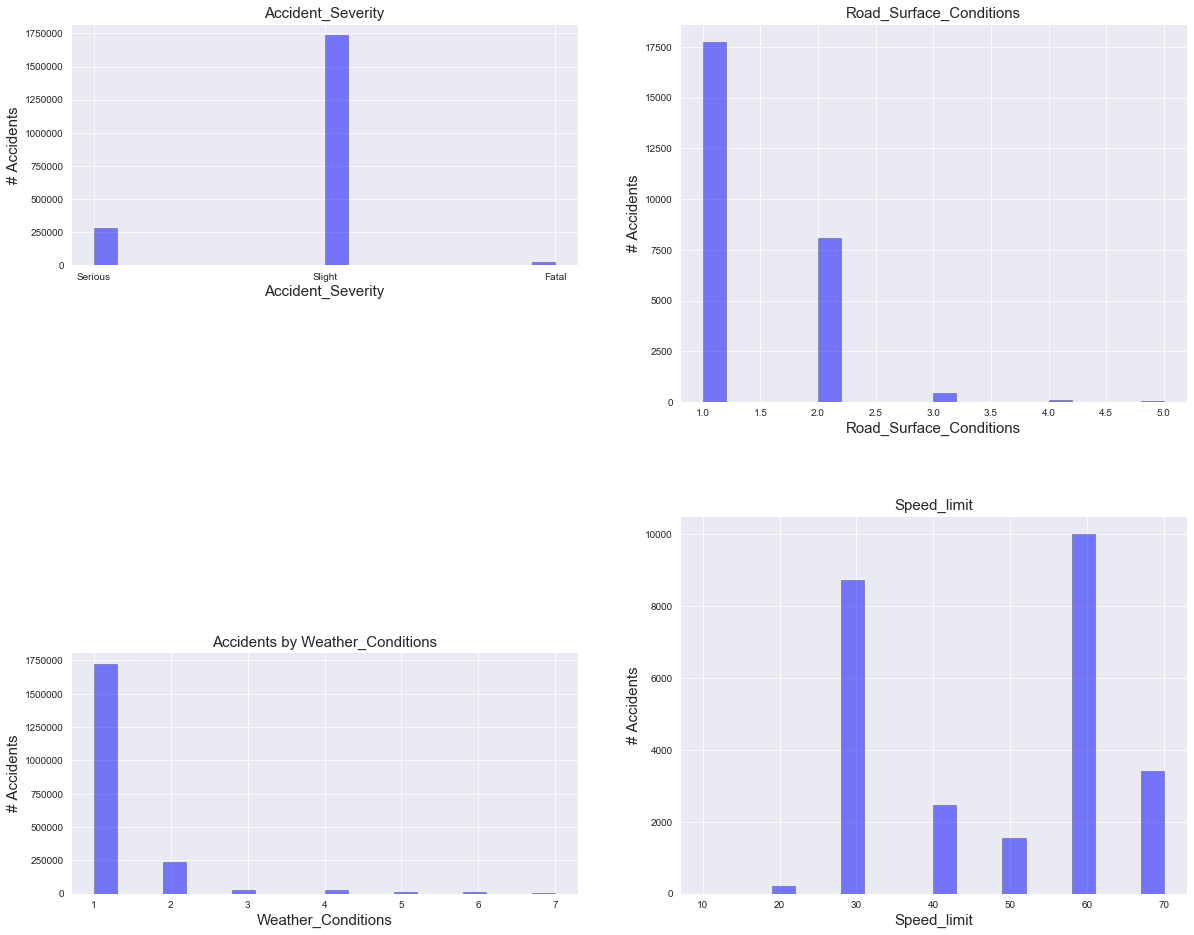

In [96]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)
ax1 = fig.add_subplot(321)
ax1.hist(dfa['Accident_Severity'], bins = 20, alpha = .50,edgecolor= 'black',color ='blue')
ax1.set_xlabel('Accident_Severity', labelpad=3, fontsize = 15)
#ax1.set_xticklabels(['Fatal', 'Serious', 'Slight'], rotation=90)
ax1.set_ylabel('# Accidents',fontsize = 15)
ax1.set_title('Accident_Severity',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(dfa['Weather_Conditions'], bins = 20, alpha = .50,edgecolor= 'black',color ='blue')
ax3.set_xlabel('Weather_Conditions',fontsize = 15)
ax3.set_ylabel('# Accidents',fontsize = 15)
ax3.set_title('Accidents by Weather_Conditions',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(df_fatal['Road_Surface_Conditions'], bins = 20, alpha = .50,edgecolor= 'black',color ='blue')
ax4.set_xlabel('Road_Surface_Conditions',fontsize = 15)
ax4.set_ylabel('# Accidents',fontsize = 15)
ax4.set_title('Road_Surface_Conditions',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(df_fatal['Speed_limit'], bins = 20, alpha = .50,edgecolor= 'black',color ='blue')
ax5.set_xlabel('Speed_limit',fontsize = 15)
ax5.set_ylabel('# Accidents',fontsize = 15)
ax5.set_title('Speed_limit',fontsize = 15)

plt.show()

In [97]:
dfa['Severity_dummy'] = np.where(dfa['Accident_Severity']==3, 0, 1)
dfa['Severity_dummy'].value_counts()

1    2047256
Name: Severity_dummy, dtype: int64

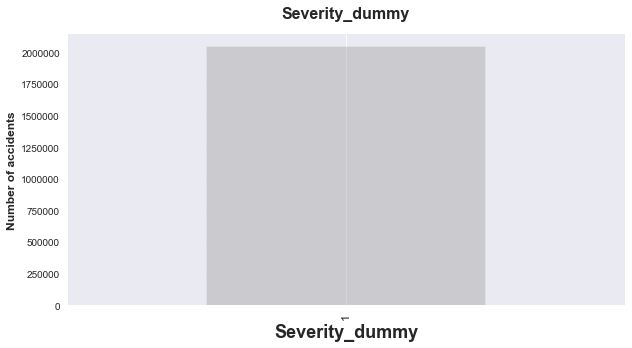

In [98]:
#plt(df['Casualty_Class'].value_counts())
fig, ax = plt.subplots(figsize=(10, 5))
ax = dfa.groupby('Severity_dummy')['Number_of_Casualties'].count().plot(kind='bar', color='grey', alpha=0.3);
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel('Severity_dummy', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Number of accidents', fontsize=12, fontweight='bold')
plt.yticks(fontsize=10)
plt.title(f'Severity_dummy', pad=15, fontsize=16, fontweight='bold');
#fig.savefig('Average Reviews_per_month by room type.jpg', bbox_inches='tight')

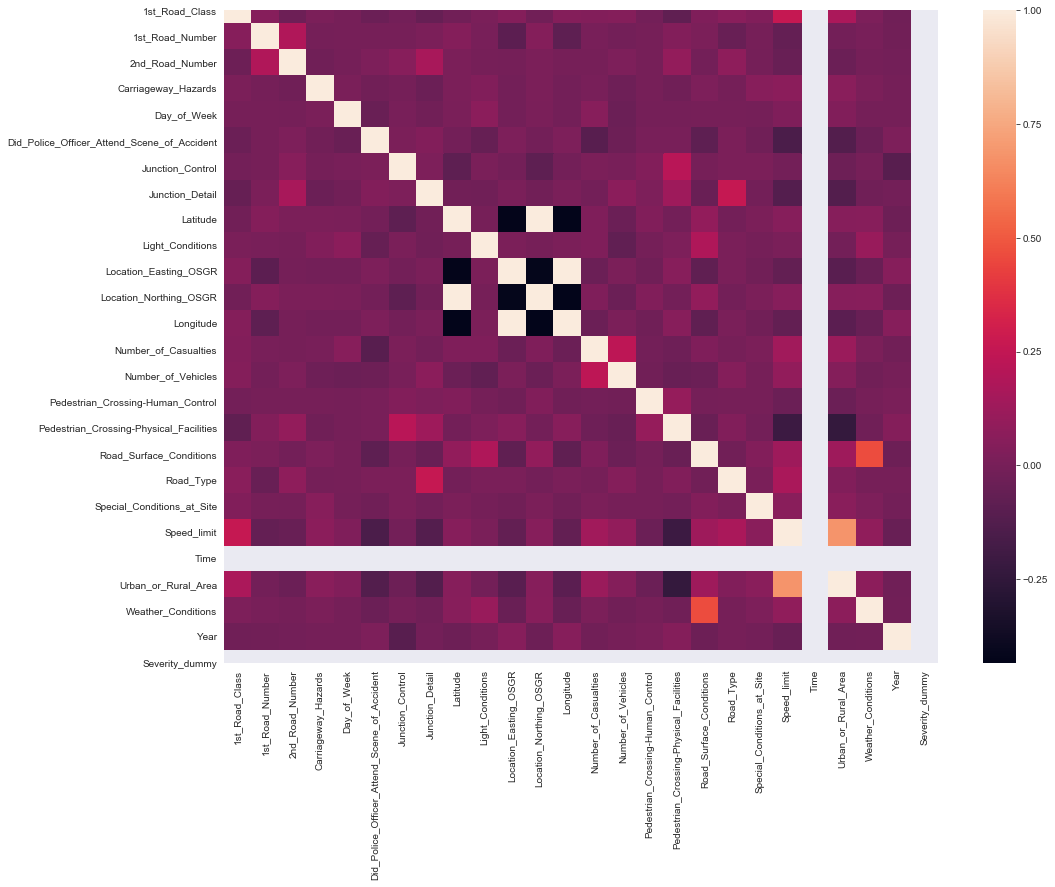

In [99]:
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(dfa.corr())#cbar=False)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.2)

# Decision Tree Model

In [90]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
Tree.feature_importances_

array([0.00640545, 0.00191181, 0.00066626, 0.01183059, 0.09190073,
       0.12293512, 0.01521983, 0.14954003, 0.00142333, 0.49066428,
       0.04761183, 0.05865415, 0.0012366 ])

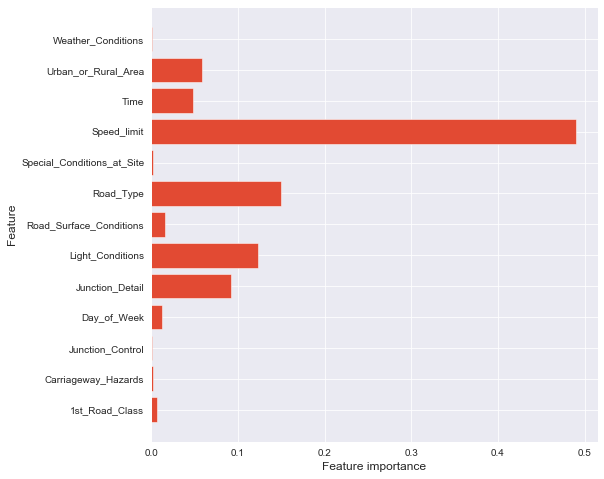

In [94]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(Tree)

In [95]:
predTree = Tree.predict(X_test)
print (predTree [0:9])
print (y_test [0:9])
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print(classification_report(y_test, predTree))
print('Accuracy of the model')
print(accuracy_score(y_test, predTree))

['Serious' 'Slight' 'Slight' 'Serious' 'Slight' 'Serious' 'Slight'
 'Serious' 'Slight']
        Accident_Severity
264782            Serious
2033427           Serious
1680534            Slight
493874            Serious
1917938            Slight
612521            Serious
1075663           Serious
1639520           Serious
577484             Slight
DecisionTrees's Accuracy:  0.623432051215323
              precision    recall  f1-score   support

     Serious       0.66      0.60      0.63     10198
      Slight       0.59      0.65      0.62      9015

    accuracy                           0.62     19213
   macro avg       0.62      0.62      0.62     19213
weighted avg       0.63      0.62      0.62     19213

Accuracy of the model
0.623432051215323


# RandomForestClassifier

In [48]:
RandomForestClassifier

Accuracy: 0.6140113464841513
[[6100 4098]
 [3318 5697]]
              precision    recall  f1-score   support

     Serious       0.65      0.60      0.62     10198
      Slight       0.58      0.63      0.61      9015

    accuracy                           0.61     19213
   macro avg       0.61      0.62      0.61     19213
weighted avg       0.62      0.61      0.61     19213



In [49]:
from sklearn.ensemble import RandomForestClassifier
#class_weight = dict({2:1, 1:15, 0:50})
rdf = RandomForestClassifier(bootstrap=True,
            class_weight="balanced_subsample", 
            criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300,
            oob_score=True,
            random_state=35,
            verbose=0, warm_start=False)

In [50]:
rdf.fit(X_train,y_train)
y_pred=rdf.predict(X_test)

In [51]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6267631291313174


In [52]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[5585 4613]
 [2558 6457]]
              precision    recall  f1-score   support

     Serious       0.69      0.55      0.61     10198
      Slight       0.58      0.72      0.64      9015

    accuracy                           0.63     19213
   macro avg       0.63      0.63      0.63     19213
weighted avg       0.64      0.63      0.62     19213



# KNeighborsClassifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (with the default parameters)
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')

# fit the model with data (occurs in-place)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[5745 4453]
 [3861 5154]]
              precision    recall  f1-score   support

     Serious       0.60      0.56      0.58     10198
      Slight       0.54      0.57      0.55      9015

    accuracy                           0.57     19213
   macro avg       0.57      0.57      0.57     19213
weighted avg       0.57      0.57      0.57     19213

0.5672721594753553


# LogisticRegression

In [100]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[6692 3506]
 [3842 5173]]
              precision    recall  f1-score   support

     Serious       0.64      0.66      0.65     10198
      Slight       0.60      0.57      0.58      9015

    accuracy                           0.62     19213
   macro avg       0.62      0.62      0.62     19213
weighted avg       0.62      0.62      0.62     19213

0.6175506167698954


# GaussianNB

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print(format(classification_report(y_test, y_pred)))

0.6178108572320824
              precision    recall  f1-score   support

     Serious       0.64      0.63      0.64     10198
      Slight       0.59      0.61      0.60      9015

    accuracy                           0.62     19213
   macro avg       0.62      0.62      0.62     19213
weighted avg       0.62      0.62      0.62     19213



# GradientBoostingClassifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss="deviance", learning_rate=0.1, 
      n_estimators=100, subsample=1.0, criterion="friedman_mse", 
      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
      max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
      random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, 
      presort="auto")

y_pred = gbc.fit(X_train, y_train.values.ravel()).predict(X_test)
print(format(classification_report(y_test, y_pred)))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

     Serious       0.66      0.62      0.64     10198
      Slight       0.60      0.63      0.61      9015

    accuracy                           0.63     19213
   macro avg       0.63      0.63      0.63     19213
weighted avg       0.63      0.63      0.63     19213

0.6279081871649405
